# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [7]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

586

In [3]:
# cities_pd = pd.read_csv("../output_data/cities.csv")
# cities_pd.head()

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [8]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
# create needed columns

City = []
date = []
lat = []
lon = []
max_temp = []
clouds = []
wind = []
humidity = []
Country = []

for city in cities:
    try:
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        clouds.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        Country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        City.append(city)
        
        print('city name is' + city)
        
    except:
        print("city not found")
    

city name iszabol
city name iseast london
city name isliberty
city name ismangai
city name isgardenstown
city name isakureyri
city name iscarnarvon
city name ishilo
city name islagoa
city name isqaanaaq
city name isushuaia
city not found
city name isgat
city name ispuerto ayora
city name iscape town
city name isupernavik
city name isbluff
city name isnaze
city name ischokurdakh
city name isalbany
city name iskathmandu
city not found
city not found
city name ispuerto escondido
city name ismarystown
city name isbredasdorp
city name iskudahuvadhoo
city name ischichi
city name isacapulco
city not found
city name iscururupu
city name issevero-kurilsk
city name iswarrensburg
city name isznamenskoye
city not found
city name issarakhs
city name isquelimane
city name isbambous virieux
city name isthompson
city name ispunta arenas
city name isvila franca do campo
city name isrikitea
city name istiksi
city name issao felix do xingu
city name ishobart
city name isbiak
city name iskapaa
city name i

city name ismonze
city name istereze
city name isust-koksa
city name iscape canaveral
city name issolano
city name isvestmannaeyjar
city name ishigh level
city name isaraouane
city name iskaitangata
city name isvallenar
city name isnovikovo
city name iskashi
city not found
city name isplaeng yao
city name iskoslan
city name isrichards bay
city name issalym
city name islasa
city not found
city name issan luis
city name istocopilla
city name isoranjemund
city name isnorth platte
city name iswitu
city name istonantins
city name isriyadh
city name islaguna
city name isburibay
city name isport hawkesbury
city name iskalanguy
city name isanif
city name isokhotsk
city name isyelabuga
city name isulladulla
city name isverd
city name isforest grove
city name istautira
city name isanahuac
city name ismishelevka
city name issungaipenuh
city name isnorman wells
city name isfare
city name isklaksvik
city name ishobyo
city name isnajran
city name isbarabai
city name ismarion
city name issenno
city n

In [11]:
weather_dict = {
    "City": City,
    "date": date,
    "lat": lat,
    "lon": lon,
    "max_temp": max_temp,
    "clouds": clouds,
    "wind": wind,
    "humidity": humidity,
    "Country": Country
}
weather_data = pd.DataFrame(weather_dict)
weather_data.head()

,City,date,lat,lon,max_temp,clouds,wind,humidity,Country
0,zabol,1595986588,32.25,67.25,73.33,0,4.09,20,AF
1,east london,1595986588,-33.02,27.91,61.11,0,11.23,70,ZA
2,liberty,1595986373,31.83,-81.50,84.20,75,13.87,62,US
3,mangai,1595986588,-4.05,19.53,72.10,0,1.03,53,CD
4,gardenstown,1595986588,57.67,-2.34,54.00,100,37.00,79,GB


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [12]:
weather_data.loc[weather_data['humidity'] > 100]

,City,date,lat,lon,max_temp,clouds,wind,humidity,Country


In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [14]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv
weather_data.to_csv("../output_data/cities.csv")

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

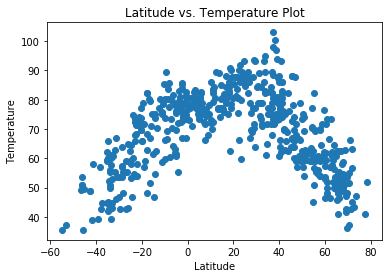

In [25]:
plt.scatter(weather_data['lat'], weather_data['max_temp'])
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title('Latitude vs. Temperature Plot')
plt.savefig('../output_data/Fig1.png')

## Latitude vs. Humidity Plot

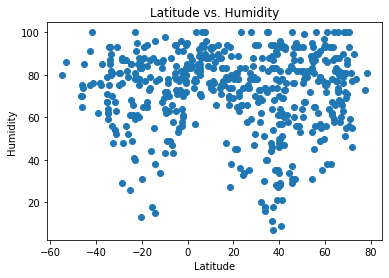

In [28]:
plt.scatter(weather_data['lat'], weather_data['humidity'])
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Latitude vs. Humidity')
plt.savefig('../output_data/Fig2.png')

## Latitude vs. Cloudiness Plot

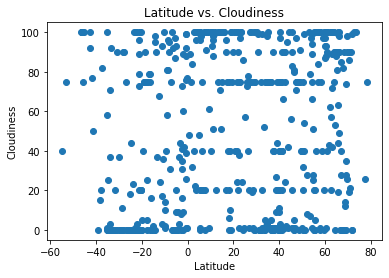

In [26]:
plt.scatter(weather_data['lat'], weather_data['clouds'])
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Latitude vs. Cloudiness')
plt.savefig('../output_data/Fig3.png')

## Latitude vs. Wind Speed Plot

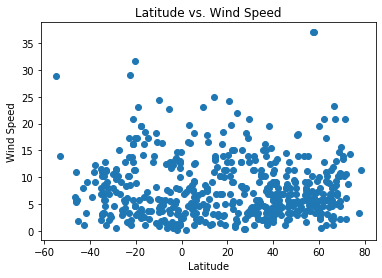

In [27]:
plt.scatter(weather_data['lat'], weather_data['wind'])
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Latitude vs. Wind Speed')
plt.savefig('../output_data/Fig4.png')

## Linear Regression

In [29]:
# OPTIONAL: Create a function to create Linear Regression plots
def linearplot(x_values, y_values, y_label):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(6,10),fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)

In [30]:
# Create Northern and Southern Hemisphere DataFrames
northern_df = weather_data.loc[weather_data['lat'] >= 0]
southern_df = weather_data.loc[weather_data['lat'] < 0]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

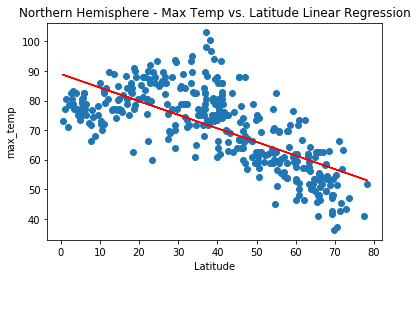

In [31]:
x_values = northern_df['lat']
y_values = northern_df['max_temp']
linearplot(x_values, y_values, 'max_temp')
plt.savefig('../output_data/Fig5.png')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

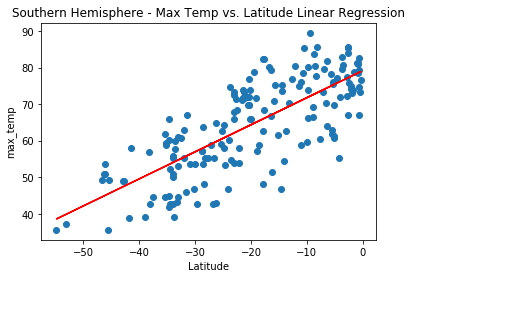

In [32]:
x_values = southern_df['lat']
y_values = southern_df['max_temp']
linearplot(x_values, y_values, 'max_temp')
plt.savefig('../output_data/Fig6.png')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

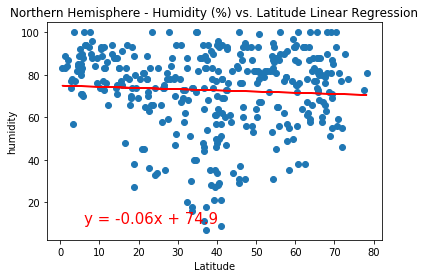

In [34]:
x_values = northern_df['lat']
y_values = northern_df['humidity']
linearplot(x_values, y_values, 'humidity')
plt.savefig('../output_data/Fig7.png')
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

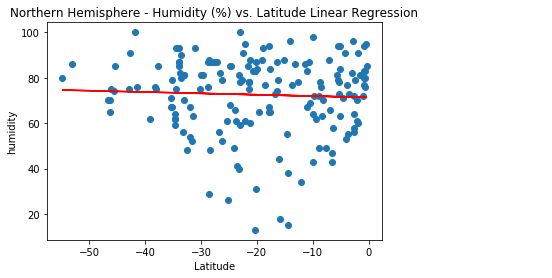

In [35]:
x_values = southern_df['lat']
y_values = southern_df['humidity']
linearplot(x_values, y_values, 'humidity')
plt.savefig('../output_data/Fig8.png')
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

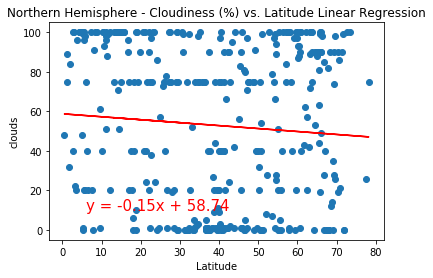

In [36]:
x_values = northern_df['lat']
y_values = northern_df['clouds']
linearplot(x_values, y_values, 'clouds')
plt.savefig('../output_data/Fig9.png')
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

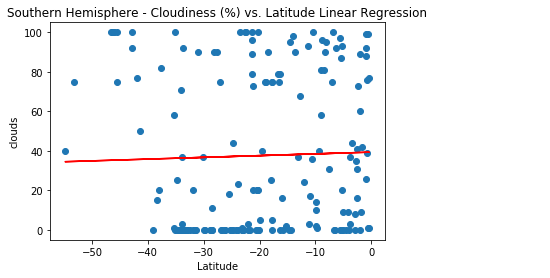

In [37]:
x_values = southern_df['lat']
y_values = southern_df['clouds']
linearplot(x_values, y_values, 'clouds')
plt.savefig('../output_data/Fig10.png')
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

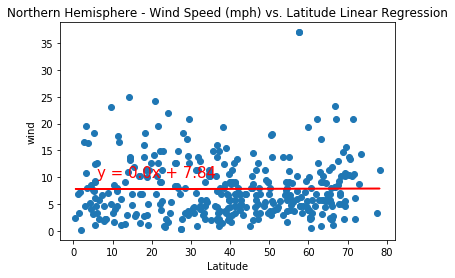

In [38]:
x_values = northern_df['lat']
y_values = northern_df['wind']
linearplot(x_values, y_values, 'wind')
plt.savefig('../output_data/Fig11.png')
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

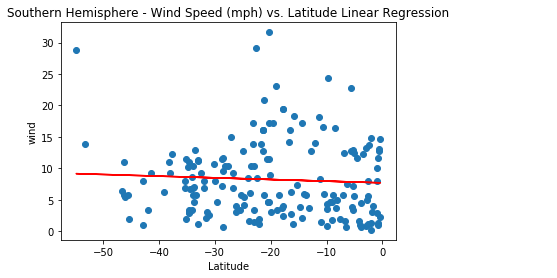

In [39]:
x_values = southern_df['lat']
y_values = southern_df['wind']
linearplot(x_values, y_values, 'wind')
plt.savefig('../output_data/Fig12.png')
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
plt.show()